# Plotting the topography of Berwick Law

This Notebook is to summarize all the code used to visualize and analyze the topography of Berwick Law.

In [10]:
# Import all the necessary libraries
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import folium

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

## 25m DTM data
Plotting the contours and elevation of the *unblended* 25dtm Berwick Law data.

In [2]:
# Reading in the data
elevation = np.loadtxt('NorthBerwickLaw.txt')

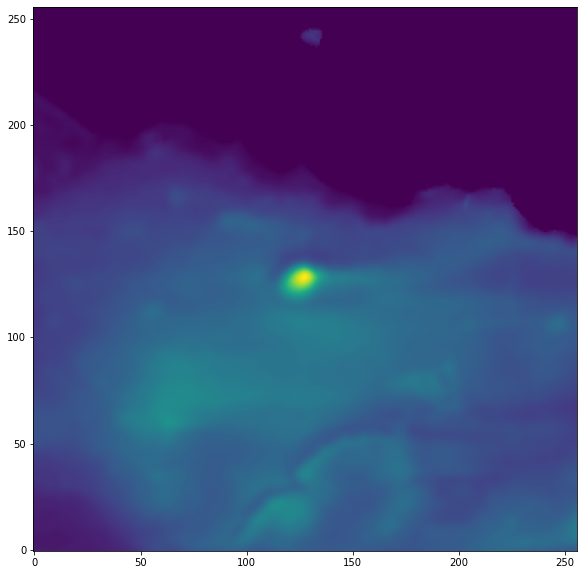

In [3]:
# Need to rotate this first
fig, ax = plt.subplots()
plt.imshow(elevation, origin='lower')

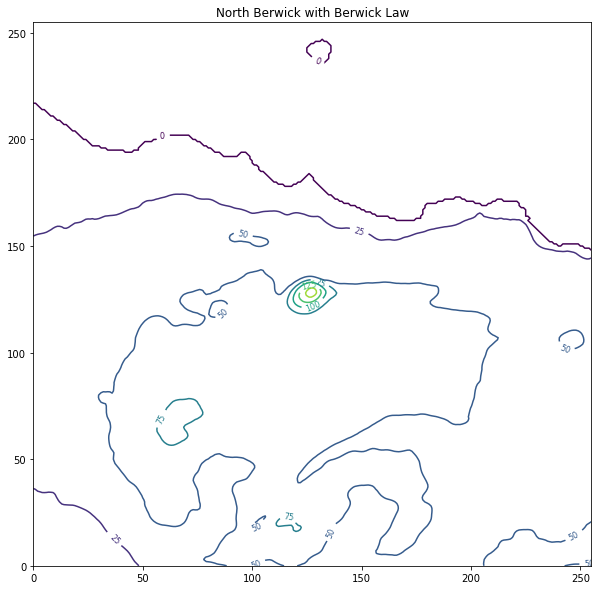

In [4]:
# Contour plot of North BErwick and Berwick Law
fig, ax = plt.subplots()

CS = ax.contour(elevation)

ax.clabel(CS, inline=1, fontsize=8, fmt='%1.f')
ax.set_title('North Berwick with Berwick Law')
plt.show()

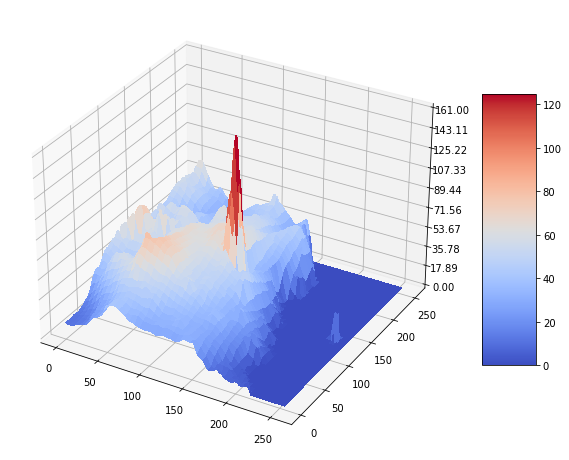

In [5]:
#3d surface
# make the z axis higher so that it doesn't look like a spike

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
n=len(elevation)
X = np.arange(0, n, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
B = elevation[X,Y]

# Plot the surface.
surf = ax.plot_surface(X, Y, B, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [6]:
pip install cmocean

  Using cached cmocean-2.0-py3-none-any.whl (223 kB)
Note: you may need to restart the kernel to use updated packages.


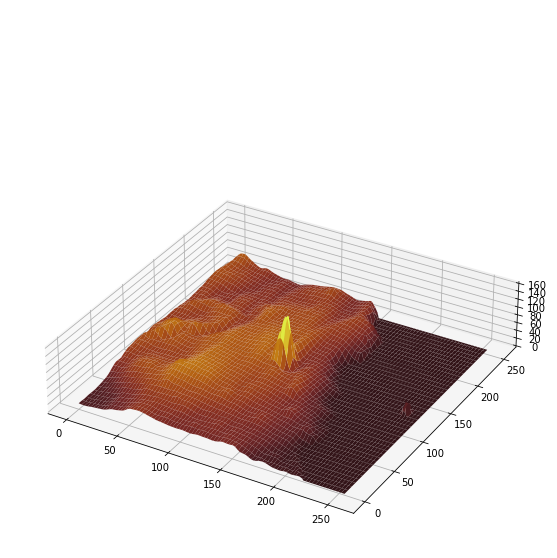

In [7]:
# Another way of using plot_surface

import cmocean as cmo

elevation = np.loadtxt('NorthBerwickLaw.txt')
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')

# Scaling of the z-axis to make the plot less spiky and more realistic
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.3, 1]))

n=len(elevation)
X = np.arange(0, n, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
B = elevation[X,Y]

# Plot the surface.
ax.plot_surface(X, Y, B, cmap= cmo.cm.solar, rcount=50, ccount=100)
#ax.plot_surface(X, Y, B,rcount=50, ccount=100) # without color map

# deep, topo, balance, amp, turbid, solar
# I prefer solar or balance or deep

## 2m LIDAR data


In [8]:
# When we have data we can do the same as before

## Fieldwork suggestions
Here's a map with the suggested locations where wind measurements can be made by future groups

In [11]:
# NEed to add more locations, measurement 1 is an example

# Create the basemap
loc = [56.0486, -2.7150] # Coordinates of Edinburgh
m1 = folium.Map(location=loc, # Map centred at Edinburgh
                tiles='OpenStreetMap', 
                zoom_start=17) # Zoomed in to show central Edinburgh

# Add pop-up showing the coordinates when clicking anywhere on the map
m1.add_child(folium.LatLngPopup())

# Add a marker at Argyle House (Noteable's offices)
tooltip = 'Click me!'
locationName = 'Measurement 1' # Text for pop-up
workloc = [ 56.0480, -2.7166] # Coordinates of Measurement 1
folium.Marker(workloc, popup=locationName).add_to(m1) # Add the marker to basemap
display(m1)

In [ ]:
#How many measurements
#How long does it take to take a measurement
#Do they have to be made at the same time?
#Do we need to think about the wind direction on the day of the measurement
#Trees or other obstructions
#Do we need permission to any areas on the law
#Portable anemometer taken to the measurement location
#measurements through a cross section of the hill - later years can do an animation

In [ ]:
#Find the wind direction from the horizontal components to make a windrose (Dori)
#Ask Richard for model 2 and lidar data
#Find a nice shaped island or hill (Everyone)

In [ ]:
#Zoomed in section for topoplots (of the law) (Nora)
#potentially add hillshade to the imshow